<h1 align="center">Volume 4: Spectral 2.</h1>

    NAME: Daniel Smith
    Section # 2
    DATE: 20 January 2022

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample Code

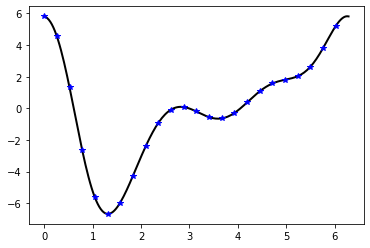

In [2]:
N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )

plt.plot(x2,derivative,'-k',linewidth=2.)
plt.plot(x1,fp,'*b')
plt.show()

# Problem 1

Create a function
that approximates 1/2u'' − u' on the Fourier grid points for N = 24.

In [46]:
up = fp # Get u'

fpp_hat = ((1j*k)**2)*f_hat
upp = np.real(ifft(fpp_hat))

# Analytic Solution
second_derivative = -3.*np.sin(x2)**2*np.cos(x2)+(2.*np.cos(x2)**3-4.*np.sin(x2)**2*np.cos(x2))+(-2.*np.exp(2.*np.sin(x2+1.))*np.sin(x2+1.)+4.*np.cos(x2+1.)*np.exp(2.*np.sin(x2+1.))*np.cos(x2+1.))

# Generate Plots 
plt.plot(x1, 0.5*upp - up, "*b", label = "FFT Approx")
plt.plot(x2, 0.5*second_derivative - derivative, color = "red", label = "Analytic")
plt.legend()
plt.title(r"FFT vs Analytic: $\frac{1}{2}u''-u'$")
plt.show()

# Problem 2 - setup

In [39]:
def initialize_all(a,b,y0,h):
    n = int((b-a)/h+1)
    X = np.linspace(a,b,n)
    if isinstance(y0,np.ndarray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X,Y,h,int(n)

def RK4(f,X,Y,h,n):
    for i in range(n-1):
        K1 = f(X[i],Y[i])
        K2 = f(X[i]+h/2,Y[i]+h/2*K1)
        K3 = f(X[i]+h/2,Y[i]+h/2*K2)
        K4 = f(X[i+1],Y[i]+h*K3)
        Y[i+1] = Y[i] + h/6*(K1+2*K2+2*K3+K4)
    return Y

# Problem 2 
Using a fourth order Runge-Kutta method (RK4), solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 8 over 150 time steps and 100 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

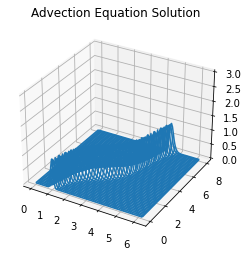

In [73]:
t_steps = 150 # Time steps
x_steps = 100 # x steps
N = x_steps

x_domain = (2*np.pi/100)*np.arange(100) # Initialize domains for x and t 
t_domain, h = np.linspace(0, 8, 150, retstep = True)

# Set up for initialize_all()
a, b = 0, 8
y0 = np.exp(-100.*(x_domain - 1.)**2)

X, Y, h, n = initialize_all(a, b, y0, h) # Get variables from initialize_all()

# Prep for RK4()
k = np.concatenate((np.arange(0, N/2), np.array([0]), np.arange(-N/2 + 1, 0))) 
c = .2 + np.sin(x_domain - 1.)**2
f = lambda t, u : -c*np.real(ifft(1j*k*fft(u)))

sol = RK4(f, X, Y, h, n) # Solution from RK4

# Generate Plot
X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,sol)
ax.set_zlim(0,3)
plt.title("Advection Equation Solution")
plt.show()